In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [44]:
data = pd.read_csv('../Collected Data/preprocessed/preprocessed_traindata.csv')

X = data.drop('Label', axis=1) #features
y = data['Label']
y = y.str.strip()
len(X)
X.tail()


,avg_accX,min_accX,max_accX,var_accX,avg_accY,min_accY,max_accY,var_accY,avg_accZ,min_accZ,...,var_accZ,avg_magnitude,min_magnitude,max_magnitude,var_magnitude,avg_pressure,min_pressure,max_pressure,var_pressure,slope_pressure
15518,-0.814126,-1.200439,-0.459473,0.034162,0.062842,-0.144409,0.201294,0.008243,-0.608755,-0.800293,...,0.010292,1.028818,0.771325,1.395415,0.031350,974.831092,974.622974,975.141330,0.020210,-0.001719
15519,-0.065311,-1.114380,0.796143,0.460808,0.339815,-0.041260,1.050781,0.110099,-0.686587,-0.897949,...,0.017239,1.052377,0.525907,1.419927,0.065569,975.047464,974.783900,975.285295,0.017133,0.003139
15520,0.030897,0.005127,0.110474,0.001942,0.037489,-0.157227,0.222290,0.015439,-0.877428,-0.897461,...,0.000938,0.888259,0.845133,0.904008,0.000568,974.676477,974.545141,974.714518,0.005220,-0.009669
15521,-0.118429,-0.367554,0.250977,0.058326,-0.011960,-0.217163,0.087280,0.004877,-0.972411,-1.077026,...,0.003965,1.011412,0.845133,1.098339,0.003505,974.293599,974.049544,974.628340,0.027540,-0.002635
15522,-0.263720,-0.287964,-0.250610,0.000082,0.048271,-0.012573,0.079590,0.001198,-0.986705,-1.010132,...,0.000161,1.023106,0.999442,1.047198,0.000148,974.344251,974.235140,974.404892,0.001170,0.000349


In [45]:
label_encoder = LabelEncoder()

encoded_traininglabels = label_encoder.fit_transform(y)

print("Encoded Labels:", encoded_traininglabels)

Encoded Labels: [0 0 0 ... 0 0 0]


In [46]:
label_mapping = dict(zip(encoded_traininglabels, y))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 'Null', 1: 'lift down', 3: 'stairs down', 4: 'stairs up', 2: 'lift up'}


In [47]:
y = encoded_traininglabels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Testing different values for n_estimators
    'max_depth': [None,5, 10, 15, 20],       # Testing different values for max_depth
}

# Initializing Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X,y)

# Get the best model and best parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 10, 'n_estimators': 150}


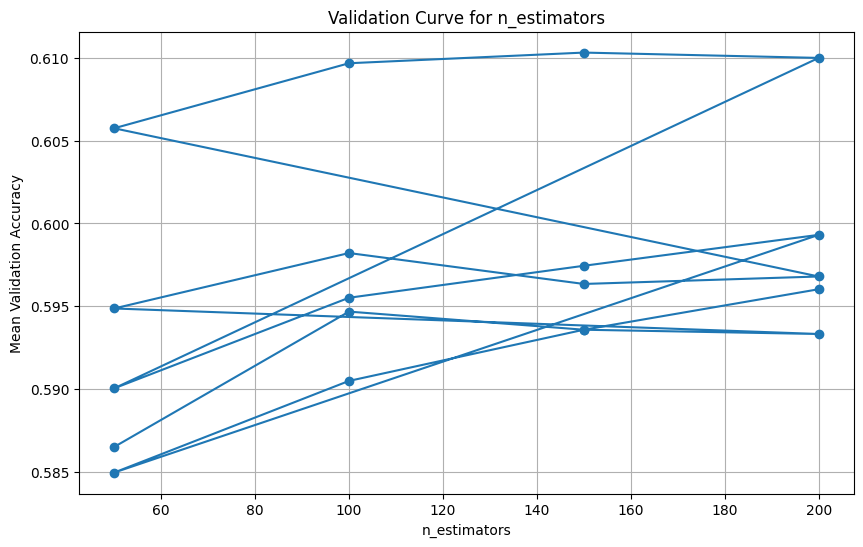

In [57]:
import matplotlib.pyplot as plt

# Extract and plot mean validation scores
mean_scores = grid_search.cv_results_['mean_test_score']
params_n_estimators = [param['n_estimators'] for param in grid_search.cv_results_['params']]

plt.figure(figsize=(10, 6))
plt.plot(params_n_estimators, mean_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Validation Accuracy')
plt.title('Validation Curve for n_estimators')
plt.grid(True)
plt.show()


In [58]:
# Training the model using the best parameters
final_rf = RandomForestClassifier(**best_params, random_state=42)
final_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [59]:

y_pred = final_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6727858293075685


In [60]:
data = pd.read_csv('../Collected Data/preprocessed/preprocessed_data20.csv')

xtest = data.drop('Label', axis=1) #features
ytest = data['Label']

In [62]:
encoded_testinglabels = label_encoder.fit_transform(ytest)
label_mapping = dict(zip(encoded_testinglabels, ytest))
print("Label Mapping:", label_mapping)
print(encoded_testinglabels)

Label Mapping: {0: 'Null', 1: 'lift down', 4: 'stairs up', 3: 'stairs down', 2: 'lift up'}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 

In [63]:
y_pred = final_rf.predict(xtest)
ytest = encoded_testinglabels
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5277161862527716
